In [177]:
import pandas as pd              #importing the pandas library and aliasing as pd
import matplotlib.pyplot as plt   #importing matplotlib and seaborn for data visualization
import seaborn as sn
%matplotlib inline


In [194]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Checking null values**

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [180]:
df.isnull().sum()[0]

0

No null values present in either column.

**Converting categrial values into numerical values**.


In [192]:
df['sex'] = df['sex'].apply({'male':0,'female':1}.get) 

In [182]:
df    #representing male as 0 and female as 1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [183]:
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df  #representing smoker as 1 and non-smoker as 0

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [184]:
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
df   

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


 southwest:1

 southeast:2
             
 northwest:3
             
 northeast:4

**Deriving inferences by performing univariate and bivariate analysis**

Data distribution analysys


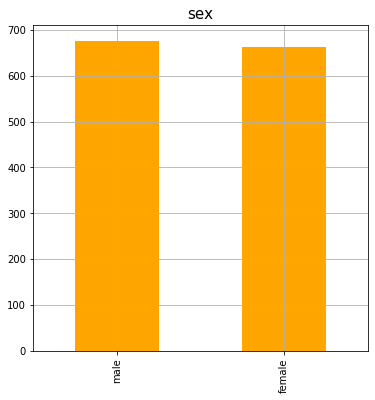

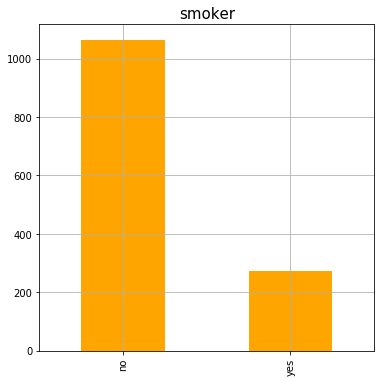

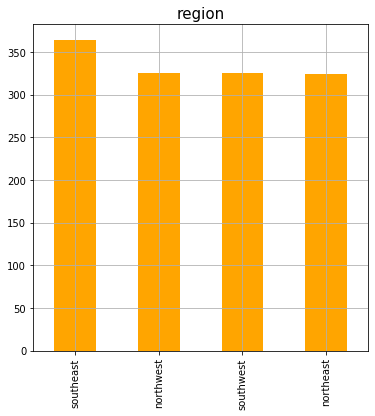

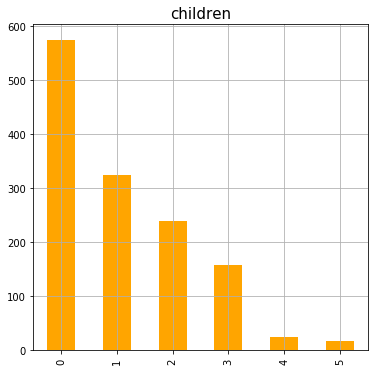

In [199]:
variables = ['sex','smoker','region','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar',color='orange',figsize=(6,6))

    plt.grid()
    plt.title(v,size=15)
    plt.show()

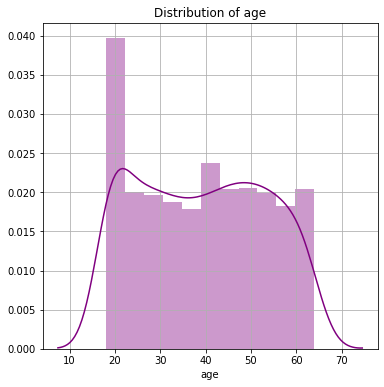

In [230]:
plt.figure(figsize=(6,6))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'purple')
plt.grid(True)

**By performing the above univariate analysis we can summarize the following points:**

1.Northeast region has the minimum patients whereas Southwest region has the maximum patients.

2.Patients who smoke 274.

3.Patients who do not smoke 1064.

4.There are 662 Female patients whereas 676 Male patients

5.Even people with younger age seek medical care

Text(0.5, 1.0, 'Sex vs Charges')

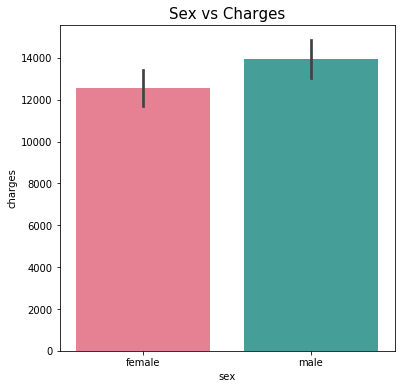

In [198]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'sex', y = 'charges', data = df,palette='husl')

plt.title('Sex vs Charges',size=15)

Text(0.5, 1.0, 'children vs charges')

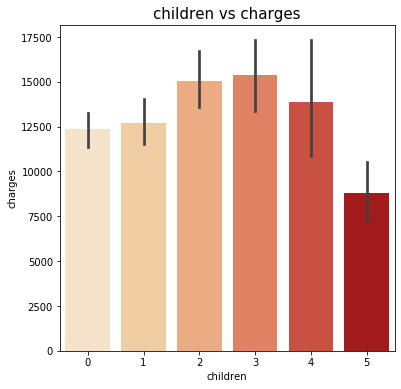

In [197]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.barplot(x = 'children', y = 'charges', data = df,palette='OrRd')
plt.title('children vs charges',size=15)

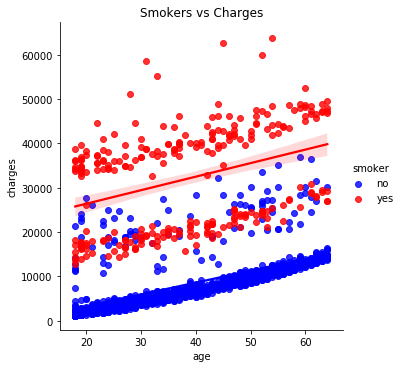

In [164]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette=dict(yes="r", no="b"));
plt.title('Smokers vs Charges');
plt.show()

Text(0.5, 1.0, 'Region vs charges')

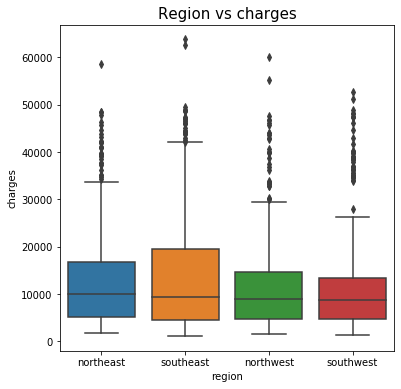

In [136]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.title('Region vs charges',size=15)

Text(0.5, 1.0, 'Smoker(Male/Female) vs Charges')

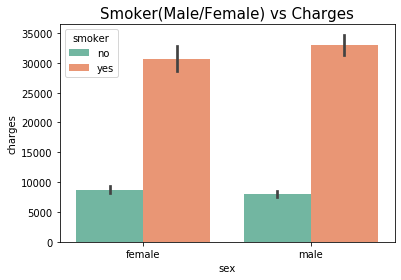

In [125]:
sns.barplot(x='sex',y='charges',hue='smoker',data=df,palette="Set2")
plt.title("Smoker(Male/Female) vs Charges",size=15)

**By performing the above bivariate analysis we can summarize the following points**

The total charges of Male gender is more than Female

The total charges of people who smoke is much higher than the people who do not smoke.

The total charges of Patients with 2 or 3 children was the highest.

The total charges of patients living in Southeast was the highest whereas Southwest was the lowest

<Figure size 432x432 with 0 Axes>

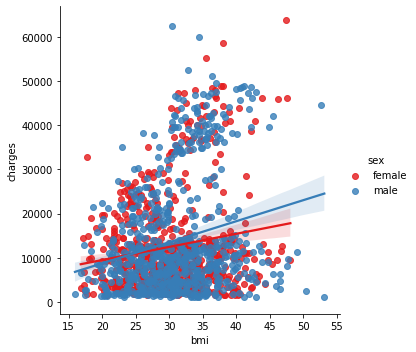

In [113]:
plt.figure(figsize=(6,6))
sns.lmplot(x='bmi',y='charges',hue='sex',data=df,palette='Set1')
plt.show()

**converting bmi into categorial data to get a better insight of the effect of weight**

In [139]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
df['bmi_c']=df['bmi'].apply(bmi_category)

In [140]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_c
772,44,female,36.48,0,no,northeast,12797.20962,obese
420,64,male,33.88,0,yes,southeast,46889.26120,obese
793,53,male,20.90,0,yes,southeast,21195.81800,normal-weight
1156,19,male,44.88,0,yes,southeast,39722.74620,obese
843,57,female,29.81,0,yes,southeast,27533.91290,over-weight
...,...,...,...,...,...,...,...,...
1272,43,male,25.52,5,no,southeast,14478.33015,over-weight
640,33,male,42.40,5,no,southwest,6666.24300,obese
1116,41,male,29.64,5,no,northeast,9222.40260,over-weight
1130,39,female,23.87,5,no,southeast,8582.30230,normal-weight


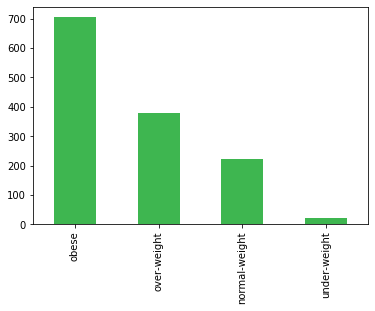

In [149]:
df['bmi_c'].value_counts().plot(kind='bar',color='#3EB650')


**The dataset contains patients which are mostly in the obese category followed by over-weight**

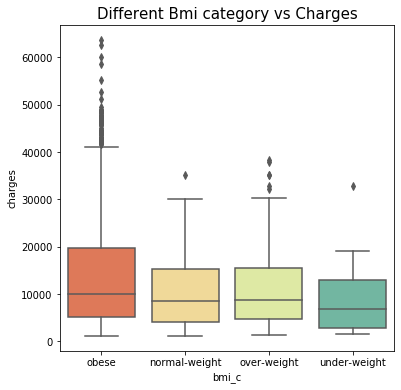

In [158]:
plt.figure(figsize=(6,6))
sns.boxplot(x='bmi_c',y='charges',data=df,palette='Spectral')
plt.title("Different Bmi category vs Charges",size=15)
plt.show()


**Clearly we can see obese condition leads to more diseases hence incurs more charges**

In [193]:
df

,age,sex,bmi,children,smoker,region,charges
343,63,None,36.765,0,0,4,13981.85035
944,62,None,39.930,0,0,2,12982.87470
33,63,None,28.310,0,0,3,13770.09790
1138,33,None,30.250,0,0,2,3704.35450
397,21,None,31.020,0,0,2,16586.49771
...,...,...,...,...,...,...,...
937,39,None,24.225,5,0,3,8965.79575
877,33,None,33.440,5,0,2,6653.78860
166,20,None,37.000,5,0,1,4830.63000
1116,41,None,29.640,5,0,4,9222.40260


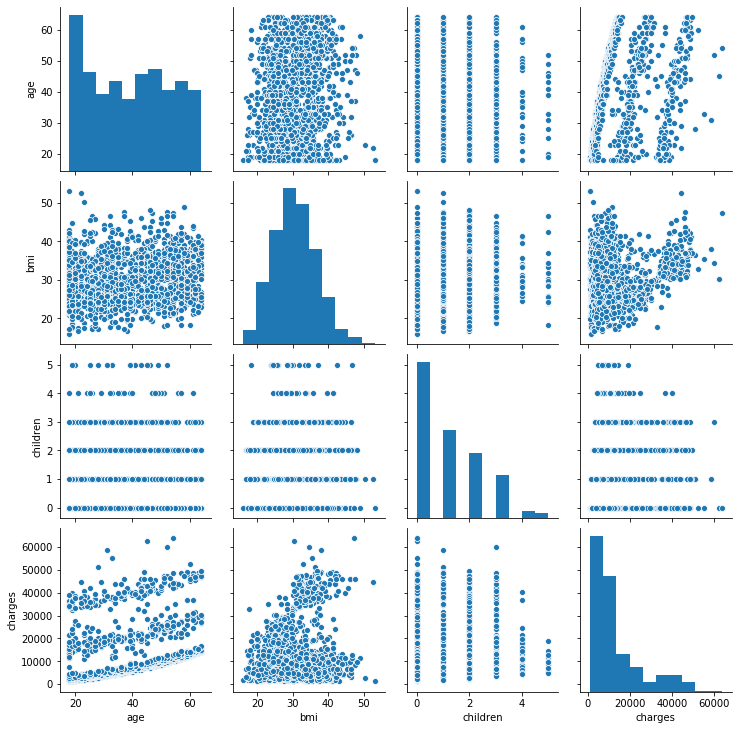

In [200]:
sns.pairplot(df)

In [211]:
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]
 

In [212]:
df['age_c']=df['age'].apply(age_category)

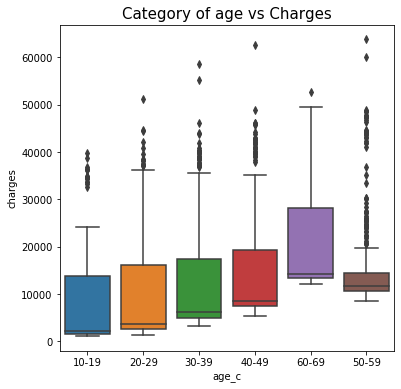

In [225]:
a=df['age_c'].sort_index()
plt.figure(figsize=(6,6))
plt.title("Category of age vs Charges",size=15)
sns.boxplot(x=a,y="charges",data=df)
plt.show()

The age category of 60-69 was the most vulnareable to the diseases 

**Correlation plot for the dataset**

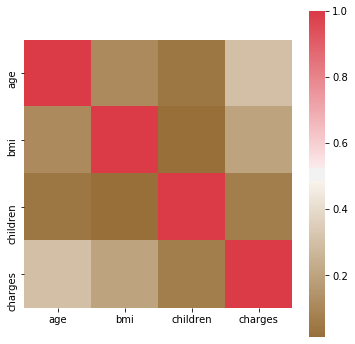

In [239]:
f,ax=plt.subplots(figsize = (6, 6))

corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)
plt.show()           